https://www.kaggle.com/imoore/60k-stack-overflow-questions-with-quality-rate

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/60k-stack-overflow-questions-with-quality-rate/valid.csv
/kaggle/input/60k-stack-overflow-questions-with-quality-rate/train.csv


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [3]:
train = pd.read_csv('/kaggle/input/60k-stack-overflow-questions-with-quality-rate/train.csv')
valid = pd.read_csv('/kaggle/input/60k-stack-overflow-questions-with-quality-rate/valid.csv')

In [4]:
train

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ
...,...,...,...,...,...,...
44995,60461435,Convert List<String> to string C# - asp.net - ...,<p>I am new to this and I am asking for help t...,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE
44996,60461754,Does Python execute code from the top or botto...,<p>I am working on learning Python and was won...,<python>,2020-02-29 03:33:59,LQ_CLOSE
44997,60462001,how to change payment date in Azure?,<p>It looks like it costs 8 days per month in ...,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE
44998,60465318,how to implement fill in the blank in Swift,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE


In [5]:
train['CreationDate'] = pd.to_datetime(train['CreationDate'])

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            45000 non-null  int64         
 1   Title         45000 non-null  object        
 2   Body          45000 non-null  object        
 3   Tags          45000 non-null  object        
 4   CreationDate  45000 non-null  datetime64[ns]
 5   Y             45000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.1+ MB


# Dataset creation for training

In [7]:
train_concat = pd.DataFrame()
train_concat["text"] = train['Title'] + ' ' + train['Body']
train_concat["Y"] = train['Y']

In [8]:
train_concat

,text,Y
0,Java: Repeat Task Every Random Seconds <p>I'm ...,LQ_CLOSE
1,Why are Java Optionals immutable? <p>I'd like ...,HQ
2,Text Overlay Image with Darkened Opacity React...,HQ
3,Why ternary operator in swift is so picky? <p>...,HQ
4,hide/show fab with scale animation <p>I'm usin...,HQ
...,...,...
44995,Convert List<String> to string C# - asp.net - ...,LQ_CLOSE
44996,Does Python execute code from the top or botto...,LQ_CLOSE
44997,how to change payment date in Azure? <p>It loo...,LQ_CLOSE
44998,how to implement fill in the blank in Swift <p...,LQ_CLOSE


In [9]:
valid_concat = pd.DataFrame()
valid_concat["text"] = valid['Title'] + ' ' + valid['Body']
valid_concat["Y"] = valid['Y']

# Preprocessing

In [10]:
pip install BeautifulSoup4

     |████████████████████████████████| 115 kB 2.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
import string
import nltk
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def removeURL(inputText):
    return re.sub(r"http\S+", "", inputText)

In [13]:
def removeHTML(inputText):
    return BeautifulSoup(inputText, "lxml").get_text()

In [14]:
def removePunctuation(inputText):
    return inputText.translate(str.maketrans('', '', string.punctuation))   

In [15]:
stopwords = stopwords.words('english')
def removeStopwords(inputTokens):
    output_tokens = []
    for token in inputTokens:
        if token not in stopwords:
            output_tokens.append(token)
    return output_tokens

In [16]:
def porterStemming(inputTokens):
    porter = PorterStemmer()
    output_tokens = []
    for token in inputTokens:
        output_tokens.append(porter.stem(token))
    return output_tokens

In [17]:
def lemmatisation(inputTokens):
    wnl = WordNetLemmatizer()
    output_tokens = []
    for token in inputTokens:
        output_tokens.append(wnl.lemmatize(token))
    return output_tokens

In [18]:
def preprocess(text):
    text = text.lower()
    text = removeURL(text)
    text = removeHTML(text)
#     text=removePunctuation(text)
    tokens = word_tokenize(text)
#     tokens=removeStopwords(tokens)
#     tokens=lemmatisation(tokens)
#     tokens=porterStemming(tokens)    
    return " ".join(tokens)

In [19]:
# Testing preprocess function on sample text
mytext = "<b>Hey there!</b> log in to https://www.google.com/ .&amp;  Here it is, are you seeing this? Test corpora"

preprocess(mytext)

'hey there ! log in to . & here it is , are you seeing this ? test corpora'

In [20]:
# Preprocess Train and validation data

In [22]:
train_concat['text'] = np.vectorize(preprocess)(train_concat['text'].to_numpy())

In [23]:
train_concat

,text,Y
0,java : repeat task every random seconds i 'm a...,LQ_CLOSE
1,why are java optionals immutable ? i 'd like t...,HQ
2,text overlay image with darkened opacity react...,HQ
3,why ternary operator in swift is so picky ? th...,HQ
4,hide/show fab with scale animation i 'm using ...,HQ
...,...,...
44995,convert list to string c # - asp.net - sql ser...,LQ_CLOSE
44996,does python execute code from the top or botto...,LQ_CLOSE
44997,how to change payment date in azure ? it looks...,LQ_CLOSE
44998,how to implement fill in the blank in swift ``...,LQ_CLOSE


In [24]:
valid_concat['text'] = np.vectorize(preprocess)(valid_concat['text'].to_numpy())

In [25]:
valid_concat

,text,Y
0,how to get all the child records from differen...,LQ_EDIT
1,retrieve all except some data of the another t...,LQ_EDIT
2,pandas : read_html i 'm trying to extract us s...,HQ
3,"reader always gim me null i 'm so new to c # ,...",LQ_EDIT
4,php rearrange array elements based on conditio...,LQ_EDIT
...,...,...
14995,how can i align two flex boxes to follow each ...,LQ_CLOSE
14996,c++ the correct way to multiply an integer and...,LQ_CLOSE
14997,why django is showing me this error when i try...,LQ_EDIT
14998,php - getting the content of php page i have a...,LQ_CLOSE


#  Feature and Labels

In [26]:
X_train = train_concat['text']
y_train = train_concat['Y']

In [27]:
X_train

0        java : repeat task every random seconds i 'm a...
1        why are java optionals immutable ? i 'd like t...
2        text overlay image with darkened opacity react...
3        why ternary operator in swift is so picky ? th...
4        hide/show fab with scale animation i 'm using ...
                               ...                        
44995    convert list to string c # - asp.net - sql ser...
44996    does python execute code from the top or botto...
44997    how to change payment date in azure ? it looks...
44998    how to implement fill in the blank in swift ``...
44999    how can i make a c # application outside of vi...
Name: text, Length: 45000, dtype: object

In [28]:
y_train

0        LQ_CLOSE
1              HQ
2              HQ
3              HQ
4              HQ
           ...   
44995    LQ_CLOSE
44996    LQ_CLOSE
44997    LQ_CLOSE
44998    LQ_CLOSE
44999    LQ_CLOSE
Name: Y, Length: 45000, dtype: object

In [29]:
X_valid = valid_concat['text']
y_valid = valid_concat['Y']

In [31]:
X_valid

0        how to get all the child records from differen...
1        retrieve all except some data of the another t...
2        pandas : read_html i 'm trying to extract us s...
3        reader always gim me null i 'm so new to c # ,...
4        php rearrange array elements based on conditio...
                               ...                        
14995    how can i align two flex boxes to follow each ...
14996    c++ the correct way to multiply an integer and...
14997    why django is showing me this error when i try...
14998    php - getting the content of php page i have a...
14999    why ca n't overloaded functions vary only by r...
Name: text, Length: 15000, dtype: object

# BERT

In [32]:
import tensorflow as tf
import transformers
from sklearn.metrics import accuracy_score

In [33]:
# Detect hardware, return appropriate distribution strategy

try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS available: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.0.0.2:8470
REPLICAS available:  8


In [34]:
targets = {'HQ': 0, 'LQ_EDIT': 1, 'LQ_CLOSE': 2}
y_train = y_train.map(targets)
y_valid = y_valid.map(targets)
y_train

0        2
1        0
2        0
3        0
4        0
        ..
44995    2
44996    2
44997    2
44998    2
44999    2
Name: Y, Length: 45000, dtype: int64

In [35]:
y_valid

0        1
1        1
2        0
3        1
4        1
        ..
14995    2
14996    2
14997    1
14998    2
14999    2
Name: Y, Length: 15000, dtype: int64

In [36]:
# Maximum sequence size for BERT is 512

def regular_encode(texts, tokenizer, maxlen = 512):
    enc_di = tokenizer.batch_encode_plus(texts,truncation=True, return_token_type_ids = False, padding='max_length', max_length = maxlen)
    return np.array(enc_di['input_ids'])

In [37]:
#bert large uncased pretrained tokenizer

tokenizer = transformers.BertTokenizer.from_pretrained('bert-large-uncased')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [38]:
#tokenizing the questions descriptions and converting the categories into one hot vectors using tf.keras.utils.to_categorical

Xtrain_encoded = regular_encode(X_train.astype('str'), tokenizer, maxlen = 256)
ytrain_encoded = tf.keras.utils.to_categorical(y_train, num_classes = 3, dtype = 'int32')
Xtest_encoded = regular_encode(X_valid.astype('str'), tokenizer, maxlen = 256)
ytest_encoded = tf.keras.utils.to_categorical(y_valid, num_classes = 3, dtype = 'int32')

In [39]:
Xtrain_encoded.shape

(45000, 256)

In [40]:
def build_model(transformer, loss = 'categorical_crossentropy', max_len = 512):
    input_word_ids = tf.keras.layers.Input(shape = (max_len,), dtype = tf.int32, name = "input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]

    #adding dropout layer
    x = tf.keras.layers.Dropout(0.40)(cls_token)

    #using a dense layer of 3 neurons as the number of unique categories is 3. 
    out = tf.keras.layers.Dense(3, activation = 'sigmoid')(x)

    model = tf.keras.Model(inputs = input_word_ids, outputs = out)
    model.compile(tf.keras.optimizers.Adam(lr = 3e-5), loss = loss, metrics = ['accuracy'])
    return model

In [41]:
#building the model on tpu

with strategy.scope():
    transformer_layer = transformers.TFAutoModel.from_pretrained('bert-large-uncased')
    model = build_model(transformer_layer, max_len = 256)
model.summary()

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-large-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 256)]             0         
_________________________________________________________________
tf_bert_model (TFBertModel)  TFBaseModelOutputWithPool 335141888 
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 1024)              0         
_________________________________________________________________
dropout_73 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3075      
Total params: 335,144,963
Trainable params: 335,144,963
Non-trainable params: 0
_________________________________________________________________


In [42]:
#creating the training and testing dataset.

BATCH_SIZE = 32*strategy.num_replicas_in_sync
AUTO = tf.data.experimental.AUTOTUNE 
train_dataset = (tf.data.Dataset.from_tensor_slices((Xtrain_encoded, ytrain_encoded)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))
test_dataset = (tf.data.Dataset.from_tensor_slices(Xtest_encoded).batch(BATCH_SIZE))

In [43]:
#training for 20 epochs

n_steps = Xtrain_encoded.shape[0] // BATCH_SIZE
train_history = model.fit(train_dataset, steps_per_epoch = n_steps, epochs = 20,validation_data=(Xtest_encoded, ytest_encoded))

Epoch 1/20
175/175 [==============================] - 287s 859ms/step - loss: 1.0938 - accuracy: 0.4451 - val_loss: 0.6851 - val_accuracy: 0.6854
Epoch 2/20
175/175 [==============================] - 126s 720ms/step - loss: 0.6207 - accuracy: 0.7291 - val_loss: 0.6020 - val_accuracy: 0.7331
Epoch 3/20
175/175 [==============================] - 126s 720ms/step - loss: 0.5137 - accuracy: 0.7801 - val_loss: 0.6162 - val_accuracy: 0.7490
Epoch 4/20
175/175 [==============================] - 126s 720ms/step - loss: 0.4453 - accuracy: 0.8092 - val_loss: 0.6598 - val_accuracy: 0.7323
Epoch 5/20
175/175 [==============================] - 126s 720ms/step - loss: 0.3835 - accuracy: 0.8409 - val_loss: 0.6915 - val_accuracy: 0.7523
Epoch 6/20
175/175 [==============================] - 126s 720ms/step - loss: 0.2994 - accuracy: 0.8763 - val_loss: 0.7642 - val_accuracy: 0.7556
Epoch 7/20
175/175 [==============================] - 126s 720ms/step - loss: 0.2289 - accuracy: 0.9087 - val_loss: 0.9167 -

Prediction Accuracy on Validation dataset¶

In [44]:
#making predictions 

preds = model.predict(test_dataset, verbose = 1)

#converting the one hot vector output to a linear numpy array.
pred_classes = np.argmax(preds, axis = 1)

59/59 [==============================] - 35s 491ms/step


In [45]:
print('Prediction Accuracy on Validation dataset: ', np.round(100*accuracy_score(pred_classes, y_valid), 2), '%')

Prediction Accuracy on Validation dataset:  74.95 %


In [90]:
print(train_history.params)

{'verbose': 1, 'epochs': 20, 'steps': 175}


In [91]:
print(train_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [98]:
train_acc = train_history.history.get('accuracy')
val_acc = train_history.history.get('val_accuracy')

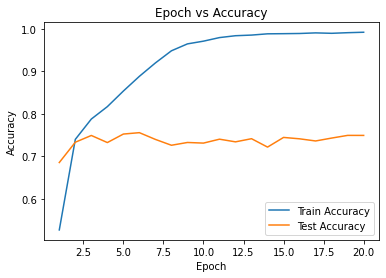

In [107]:
epoch =range(1,21)
plt.plot(epoch,train_acc)
plt.plot(epoch,val_acc)
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(["Train Accuracy", "Test Accuracy"], loc ="lower right")
plt.show()

In [46]:
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve,classification_report
from sklearn import metrics

In [73]:
print(classification_report(y_valid, pred_classes))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      5000
           1       0.77      0.67      0.72      5000
           2       0.63      0.78      0.70      5000

    accuracy                           0.75     15000
   macro avg       0.76      0.75      0.75     15000
weighted avg       0.76      0.75      0.75     15000



In [74]:
cm = metrics.confusion_matrix(y_valid, pred_classes)

In [75]:
cm

array([[4021,  207,  772],
       [ 178, 3332, 1490],
       [ 338,  773, 3889]])

In [76]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [87]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
#     plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [88]:
cm_plot_labels = ['HQ','LQ_Close','LQ_Edit']

Confusion matrix, without normalization
[[4021  207  772]
 [ 178 3332 1490]
 [ 338  773 3889]]


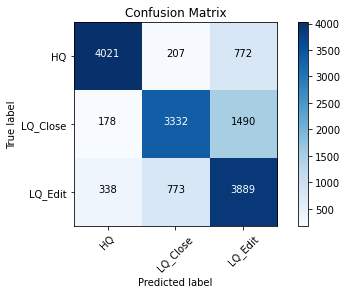

In [89]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
